# Heart Disease Prediction

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc , classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

import pickle

## Importing Data

In [2]:
data=pd.read_csv('heart_disease_data.csv')

In [3]:
print(data.shape)
data.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Description

***age***: The person's age in years

***sex***: The person's sex (1 = male, 0 = female)

***cp***: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

***trestbps***: The person's resting blood pressure (mm Hg on admission to the hospital)

***chol***: The person's cholesterol measurement in mg/dl

***fbs***: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

***restecg***: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

***thalach***: The person's maximum heart rate achieved

***exang***: Exercise induced angina (1 = yes; 0 = no)

***oldpeak***: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

***slope***: The slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

***ca***: The number of major vessels (0-3)

***thal***: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

***target***: Heart disease (1 = no, 0 = yes), we will invert these values.

In [4]:
# We will invert the target values as currently they are opposite to what we are accustomed to(1 = yes, 0 = no) in 
#classification problems.

data['target']=data['target'].map({1 : 0, 0 : 1})
data['target']

# Now in the target variable 0 = no heart disease and 1 = presence of heart disease.

0      0
1      0
2      0
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    1
Name: target, Length: 303, dtype: int64

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.455446
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* The dataset is clean as there are no NULL values nor any visible outliers in the data. 

## EDA

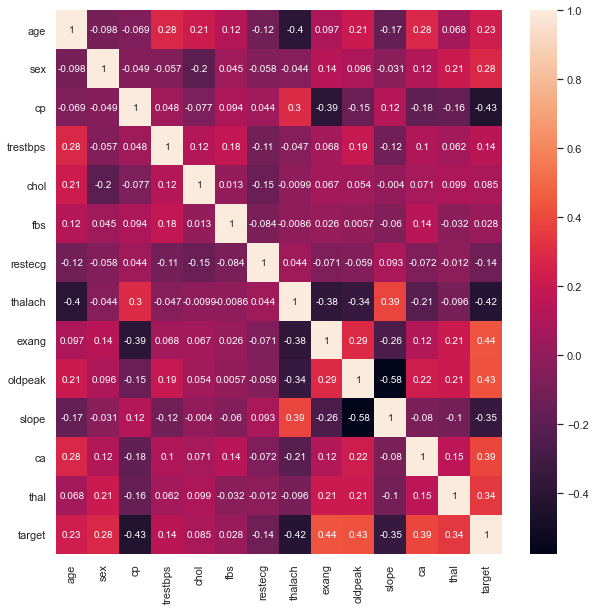

In [7]:
corr=data.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

* The above Heat Map shows that almost all of the features/attributes given in the dataset are weakly correlated with each other. This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features with each other are very high.

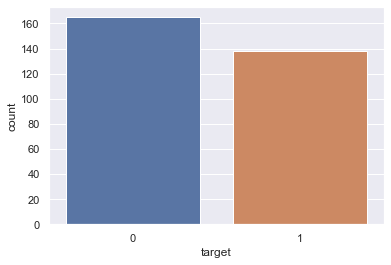

In [8]:
sns.countplot(x=data['target'])
plt.show()

In [9]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients without Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients with Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients without Heart Disease: 54.46%
Percentage of Patients with Heart Disease: 45.54%


* The dataset is fairly balanced as there is no significant difference in the number of observations of the two classes.

Percentage of Female patients: 31.68%
Percentage of Male patients: 68.32%


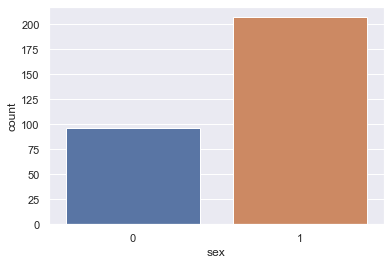

In [10]:
femalecount = len(data[data.sex == 0])
malecount = len(data[data.sex == 1])
print("Percentage of Female patients: {:.2f}%".format((femalecount / (len(data.sex))*100)))
print("Percentage of Male patients: {:.2f}%".format((malecount / (len(data.sex))*100)))

sns.countplot(x=data['sex'])
plt.show()

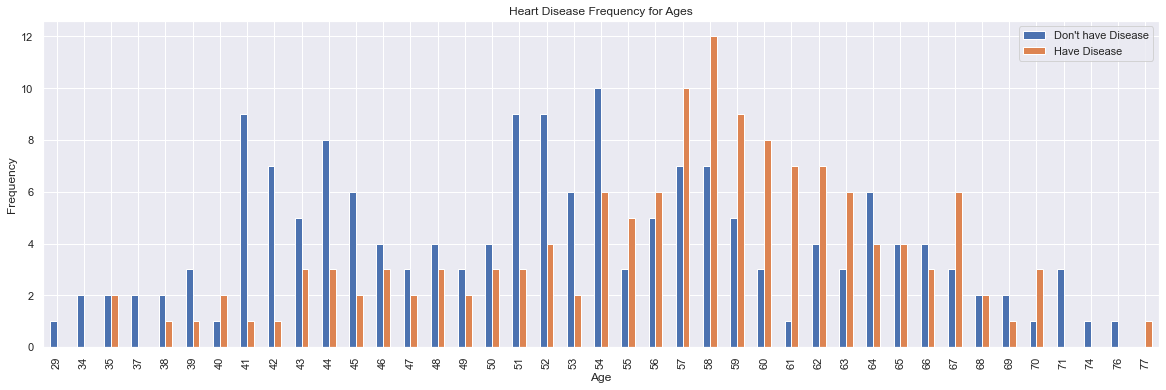

In [11]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(labels=["Don't have Disease", "Have Disease"])
#plt.savefig('disease vs age.png')
plt.show()

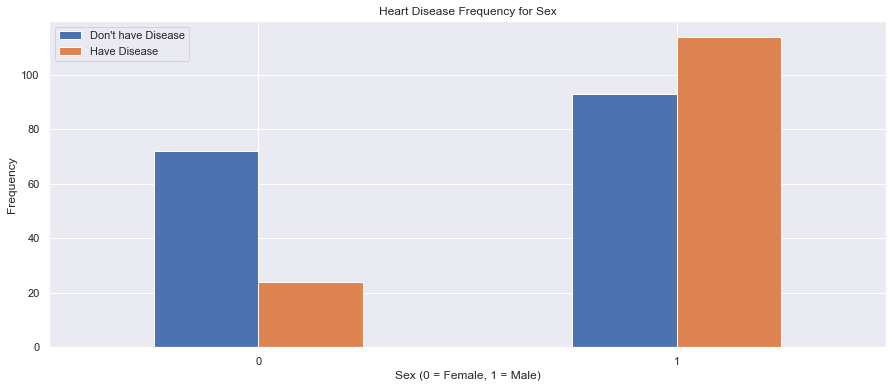

In [12]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
#plt.savefig('disease vs sex.png')
plt.show()

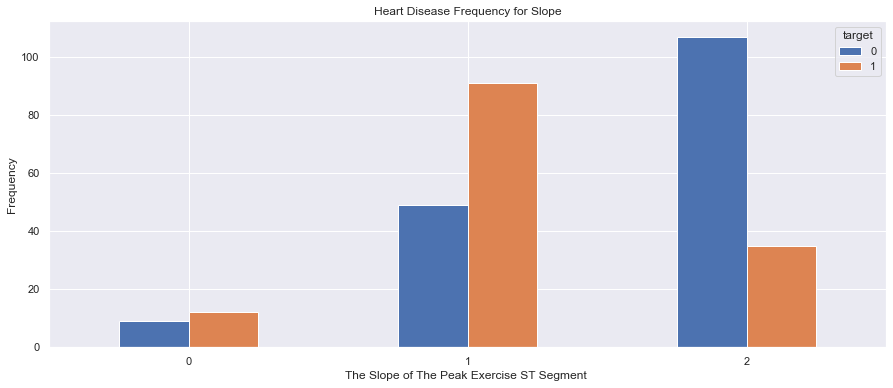

In [13]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

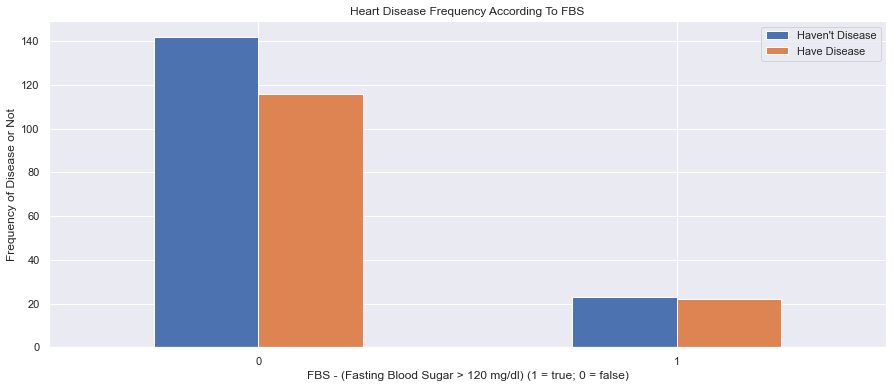

In [14]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

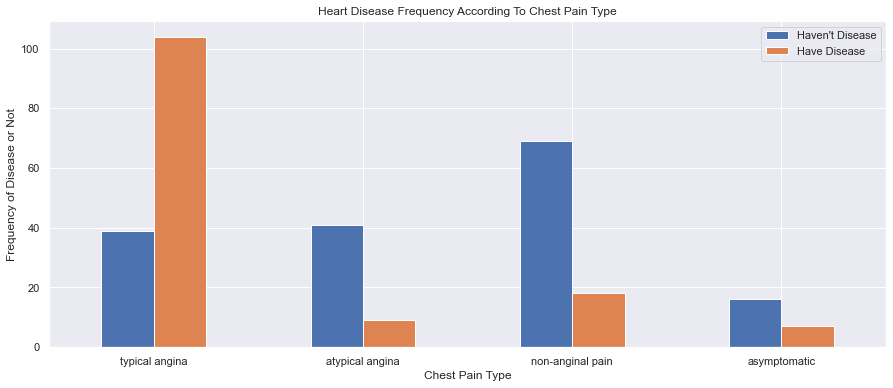

In [15]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4),['typical angina','atypical angina','non-anginal pain', 'asymptomatic'],rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
#plt.savefig('disease vs pain type')
plt.show()

## Data Pre-Conditioning

### Changing column names

* We are changing the column names to make them more readable and easier to understand.

In [16]:
data1=data.copy()
data1.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [17]:
data1['sex'][data1['sex'] == 0] = 'female'
data1['sex'][data1['sex'] == 1] = 'male'

data1['chest_pain_type'][data1['chest_pain_type'] == 0] = 'typical angina'
data1['chest_pain_type'][data1['chest_pain_type'] == 1] = 'atypical angina'
data1['chest_pain_type'][data1['chest_pain_type'] == 2] = 'non-anginal pain'
data1['chest_pain_type'][data1['chest_pain_type'] == 3] = 'asymptomatic'

data1['fasting_blood_sugar'][data1['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data1['fasting_blood_sugar'][data1['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data1['rest_ecg'][data1['rest_ecg'] == 0] = 'normal'
data1['rest_ecg'][data1['rest_ecg'] == 1] = 'ST-T wave abnormality'
data1['rest_ecg'][data1['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data1['exercise_induced_angina'][data1['exercise_induced_angina'] == 0] = 'no'
data1['exercise_induced_angina'][data1['exercise_induced_angina'] == 1] = 'yes'

data1['st_slope'][data1['st_slope'] == 1] = 'upsloping'
data1['st_slope'][data1['st_slope'] == 2] = 'flat'
data1['st_slope'][data1['st_slope'] == 3] = 'downsloping'

data1['thalassemia'][data1['thalassemia'] == 1] = 'normal'
data1['thalassemia'][data1['thalassemia'] == 2] = 'fixed defect'
data1['thalassemia'][data1['thalassemia'] == 3] = 'reversable defect'

In [18]:
data1.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,0
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,0
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,0
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,0
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,0
5,57,male,typical angina,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,upsloping,0,normal,0
6,56,female,atypical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,upsloping,0,fixed defect,0
7,44,male,atypical angina,120,263,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,flat,0,reversable defect,0
8,52,male,non-anginal pain,172,199,greater than 120mg/ml,ST-T wave abnormality,162,no,0.5,flat,0,reversable defect,0
9,57,male,non-anginal pain,150,168,lower than 120mg/ml,ST-T wave abnormality,174,no,1.6,flat,0,fixed defect,0


* We will not encode the categorical variables as they are already encoded in the original dataset.

In [19]:
X= data.drop('target', axis=1)
y=data['target']

In [20]:
data1['target']=data1['target'].map({0:'No Disease',1:'Has Disease'})
#data1.to_csv('heart_disease_data_cleaned.csv',index=False)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [22]:
print('Shape of train data', X_train.shape)
print('Shape of test data', X_test.shape)

Shape of train data (242, 13)
Shape of test data (61, 13)


##  Modeling

## Logistic Regression

In [23]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred=lr.predict(X_test)
y_pred_quant = lr.predict_proba(X_test)[:, 1]

cfm=confusion_matrix(y_test,y_pred)
cfm

array([[29,  3],
       [ 4, 25]], dtype=int64)

In [25]:
score=cross_val_score(lr,X,y,cv=5)
print('Cross Validation Score:', score.mean())

Cross Validation Score: 0.8314754098360655


In [26]:
total=sum(sum(cfm))

sensitivity = cfm[0,0]/(cfm[0,0]+cfm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cfm[1,1]/(cfm[1,1]+cfm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8787878787878788
Specificity :  0.8928571428571429


In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
auc(fpr, tpr)

0.9245689655172414

* Model is performing really well as an AUC score of >=0.9 is excellent.

### Random Forest Classifier

In [28]:
clf=RandomForestClassifier(max_depth=5,n_estimators=300,n_jobs=-1, random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
y_pred = clf.predict(X_test)
y_pred_quant = clf.predict_proba(X_test)[:, 1]

cfm=confusion_matrix(y_test, y_pred)
cfm

array([[29,  3],
       [ 5, 24]], dtype=int64)

In [30]:
score=cross_val_score(clf,X,y,cv=5)
print('Cross Validation Score:', score.mean())

Cross Validation Score: 0.8446448087431694


In [31]:
total=sum(sum(cfm))

sensitivity = cfm[0,0]/(cfm[0,0]+cfm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cfm[1,1]/(cfm[1,1]+cfm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8529411764705882
Specificity :  0.8888888888888888


In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
auc(fpr, tpr)

0.9321120689655172

## XGBoost

In [54]:
xgb=XGBClassifier(n_estimators=250, max_depth=5, n_jobs=-1, learning_rate=0.1, random_state=42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [55]:
y_pred=xgb.predict(X_test)
y_pred_quant = xgb.predict_proba(X_test)[:, 1]

cfm=confusion_matrix(y_test, y_pred)
cfm

array([[25,  7],
       [ 4, 25]], dtype=int64)

In [56]:
score=cross_val_score(xgb,X,y,cv=5)
print('Cross Validation Score:', score.mean())

Cross Validation Score: 0.8151366120218579


In [57]:
total=sum(sum(cfm))

sensitivity = cfm[0,0]/(cfm[0,0]+cfm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cfm[1,1]/(cfm[1,1]+cfm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8620689655172413
Specificity :  0.78125


In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
auc(fpr, tpr)

0.9051724137931034

## Conclusion and saving the model

* The Logistic Regression and Random Forest models have similar evaluation metrics, hence we can use either of them. We will be taking the Logistic Regression model

* The metrics we obtained with the Logistic Regression model are:
1. Accuracy: ***88.52%***
2. Cross Validation Score: ***0.83***
3. Sensitivity :  ***0.87***
4. Specificity :  ***0.89***
5. AUC: ***0.92***

pickle.dump(lr, open('model.pk','wb'))